In [ ]:
!pip install gdown

In [ ]:
!gdown 1thLWAGr3l7PuTsfavP3N_VXeD8hp5oJT

Downloading...
From (original): https://drive.google.com/uc?id=1thLWAGr3l7PuTsfavP3N_VXeD8hp5oJT
From (redirected): https://drive.google.com/uc?id=1thLWAGr3l7PuTsfavP3N_VXeD8hp5oJT&confirm=t&uuid=ea51500b-0363-4374-9585-71bb3be2b1c2
To: /content/Copy of Copy of devnagari digit.zip
100% 16.6M/16.6M [00:00<00:00, 49.0MB/s]


In [ ]:
!unzip "/content/Copy of Copy of devnagari digit.zip"

Streaming output truncated to the last 5000 lines.
  inflating: DevanagariHandwrittenDigitDataset/Train/digit_7/10299.png  
  inflating: DevanagariHandwrittenDigitDataset/Train/digit_7/10300.png  
  inflating: DevanagariHandwrittenDigitDataset/Train/digit_7/10301.png  
  inflating: DevanagariHandwrittenDigitDataset/Train/digit_7/10302.png  
  inflating: DevanagariHandwrittenDigitDataset/Train/digit_7/10303.png  
  inflating: DevanagariHandwrittenDigitDataset/Train/digit_7/10304.png  
  inflating: DevanagariHandwrittenDigitDataset/Train/digit_7/10306.png  
  inflating: DevanagariHandwrittenDigitDataset/Train/digit_7/10307.png  
  inflating: DevanagariHandwrittenDigitDataset/Train/digit_7/104017.png  
  inflating: DevanagariHandwrittenDigitDataset/Train/digit_7/104018.png  
  inflating: DevanagariHandwrittenDigitDataset/Train/digit_7/104019.png  
  inflating: DevanagariHandwrittenDigitDataset/Train/digit_7/104021.png  
  inflating: DevanagariHandwrittenDigitDataset/Train/digit_7/104023.p

In [ ]:
!pip install keras tensorflow

In [ ]:
import tensorflow as tf
print(tf.keras.__version__)

3.8.0


Training set: (17000, 28, 28, 1), Labels: (17000, 10)
Testing set: (3000, 28, 28, 1), Labels: (3000, 10)


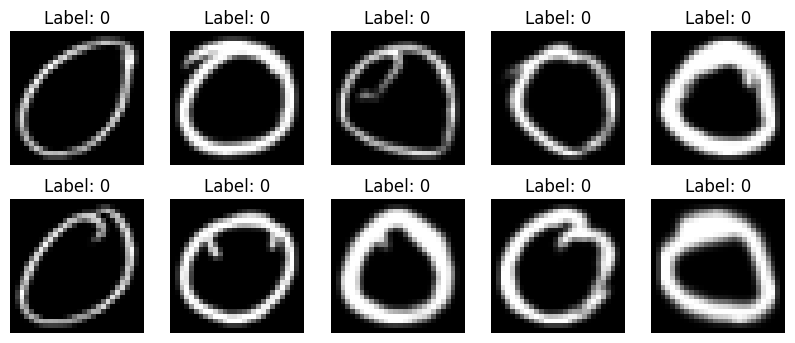

In [ ]:
# Import necessary libraries
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from PIL import Image
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Define image size and data directories
train_dir = "DevanagariHandwrittenDigitDataset/Train/"  # Replace with the correct path
test_dir = "DevanagariHandwrittenDigitDataset/Test/"   # Replace with the correct path
img_height, img_width = 28, 28

# Task 1: Data Preparation
# Function to load images and labels
def load_images_from_folder(folder):
    images = []
    labels = []
    class_names = sorted(os.listdir(folder))  # Sorted class names (digit_0, digit_1, ...)
    class_map = {name: i for i, name in enumerate(class_names)}  # Map class names to labels

    for class_name in class_names:
        class_path = os.path.join(folder, class_name)
        label = class_map[class_name]

        for filename in os.listdir(class_path):
            img_path = os.path.join(class_path, filename)

            img = Image.open(img_path).convert("L")  # Convert to grayscale
            img = img.resize((img_width, img_height))  # Resize to (28,28)
            img = np.array(img) / 255.0  # Normalize pixel values to [0,1]

            images.append(img)
            labels.append(label)

    return np.array(images), np.array(labels)

# Load the train and test datasets
x_train, y_train = load_images_from_folder(train_dir)
x_test, y_test = load_images_from_folder(test_dir)

# Reshape the images to match the expected shape (28x28x1)
x_train = x_train.reshape(-1, img_height, img_width, 1)  # Shape (num_samples, 28, 28, 1)
x_test = x_test.reshape(-1, img_height, img_width, 1)    # Shape (num_samples, 28, 28, 1)

# One-hot encode the labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Print the dataset shape for verification
print(f"Training set: {x_train.shape}, Labels: {y_train.shape}")
print(f"Testing set: {x_test.shape}, Labels: {y_test.shape}")

# Plot a few images for visualization
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i].reshape(28, 28), cmap="gray")
    plt.title(f"Label: {np.argmax(y_train[i])}")
    plt.axis("off")
plt.show()

In [ ]:
# Task 2: Build the FCN Model using Sequential API
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28, 1)),  # Input layer (flatten the image)
    keras.layers.Dense(64, activation="sigmoid"),   # Hidden layer 1
    keras.layers.Dense(128, activation="sigmoid"),  # Hidden layer 2
    keras.layers.Dense(256, activation="sigmoid"),  # Hidden layer 3
    keras.layers.Dense(10, activation="softmax")    # Output layer (10 classes)
])

# Display the model summary
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_10 (Flatten)                 │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_40 (Dense)                     │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_41 (Dense)                     │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_42 (Dense)                     │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_43 (Dense)                     │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 94,154 (367.79 KB)

 Trainable params: 94,154 (367.79 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Task 3: Compile the Model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
# Task 4: Train the Model
# Define callbacks for saving the best model and preventing overfitting
callbacks = [
    keras.callbacks.ModelCheckpoint(filepath="model_at_epoch_{epoch}.keras", save_best_only=True),  # Save model after each epoch
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=4),  # Early stopping if validation loss doesn't improve
]


In [ ]:
# Train the model
history = model.fit(
    x=x_train,  # Input data (training images)
    y=y_train,  # Target labels (training labels)
    batch_size=128,  # Batch size
    epochs=20,  # Number of epochs
    validation_split=0.2,  # 20% of the training data will be used for validation
    callbacks=callbacks,  # List of callbacks for monitoring and saving the best model
    verbose=1  # Display training progress
)


Epoch 1/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.2883 - loss: 2.0192 - val_accuracy: 0.0000e+00 - val_loss: 7.1146
Epoch 2/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8162 - loss: 0.6681 - val_accuracy: 0.0000e+00 - val_loss: 8.0251
Epoch 3/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9253 - loss: 0.2792 - val_accuracy: 0.0000e+00 - val_loss: 8.7653
Epoch 4/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9493 - loss: 0.1843 - val_accuracy: 0.0000e+00 - val_loss: 9.1424
Epoch 5/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9578 - loss: 0.1457 - val_accuracy: 0.0000e+00 - val_loss: 9.5681


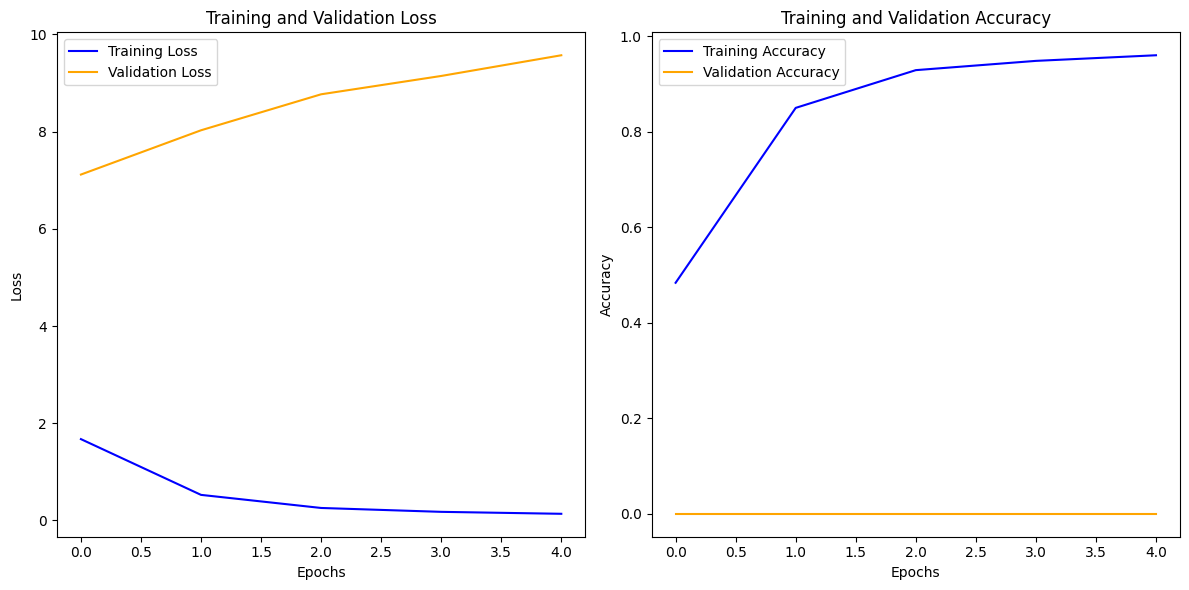

In [ ]:
# Plot the training and validation loss and accuracy
plt.figure(figsize=(12, 6))

# Training and validation loss plot
plt.subplot(1, 2, 1)
plt.plot(history.history["loss"], label="Training Loss", color="blue")
plt.plot(history.history["val_loss"], label="Validation Loss", color="orange")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.legend()

# Training and validation accuracy plot
plt.subplot(1, 2, 2)
plt.plot(history.history["accuracy"], label="Training Accuracy", color="blue")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy", color="orange")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.4f}")

94/94 - 0s - 2ms/step - accuracy: 0.7647 - loss: 2.0330
Test accuracy: 0.7647
